## K-Means: Уменьшение количества цветов изображения

In [1]:
import skimage
from skimage.io import imread

import pylab

import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

/home/yaiestura/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
def write_answer(filename, answer):
    
    with open(filename, 'w') as fout:
        
        fout.write(str(answer))
        fout.close()

### Введение

Самый распространенный тип задач машинного обучения — это задачи обучения с учителем. В них имеется обучающая выборка, для каждого объекта которой есть ответ, и нужно научиться предсказывать эти ответы для новых объектов. В такой постановке можно строго определить критерии качества.

Если же имеются лишь объекты, а ответов для них нет, то все равно можно пытаться найти в данных некую структуру. Задачи, которые ищут закономерности в неразмеченных выборках, называют задачами обучения без учителя. Типичный пример такой задачи — кластеризация, где требуется найти группы похожих объектов.

Кластеризация может использоваться для самых разных целей. В этом задании мы попробуем группировать схожие пиксели на изображении. Такой подход позволяет переходить к суперпиксельному представлению изображений, которое является более компактным и лучше подходит для решения ряда задач компьютерного зрения.

### Реализация в sklearn

Алгоритм KMeans реализован в классе <code>sklearn.cluster.KMeans</code>. Так как это один из примеров unsupervised-задачи, для обучения достаточно передать только матрицу объектов.

В качестве метрики будем использовать PSNR — адаптация метрики MSE для задачи нахождениях сходства изображений.

Для работы с изображениями мы рекомендуем воспользоваться пакетом scikit-image. Чтобы загрузить изображение, необходимо выполнить следующую команду:
```python
from skimage.io import imread
image = imread('parrots_4.jpg')
```
После этих действий переменная image будет содержать изображение в виде numpy-массива размера $n * m * 3$, где $n$ и $m$ соответствуют размерам изображения, а 3 соответствует формату представления RGB.

Если вы хотите вывести изображение на экран, необходимо, чтобы у вас была установлена библиотека matplotlib. С помощью нее это делается следующим образом:
```python
import pylab
pylab.imshow(image)
```
Если вы работаете в ipython-notebook'е, то вам необходимо перед выполнением кода выше исполнить в любой ячейке инструкцию:

```python
%matplotlib inline
```

Она позволяет выводить изображения прямо в ipython-notebook.

#### 1. Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

#### Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

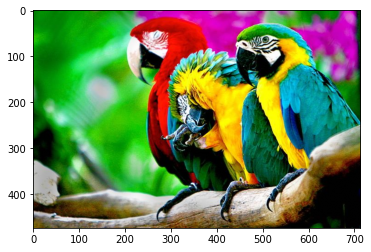

In [3]:
image = skimage.img_as_float(imread('parrots.jpg'))
pylab.imshow(image)

x, y, dim = image.shape

X = pd.DataFrame(np.reshape(image, (x * y, dim)), columns=['R', 'G', 'B'])

#### 2. Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [4]:
def kmeans_clustering(image, n_clusters):
    
    image_array = image.copy()
    
    print(f'Number of clusters: {n_clusters}')
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    kmeans.fit(image_array)
    
    image_array['cluster'] = kmeans.labels_
    
    # get a picture with mean RGB values by clusters
    
    means = image_array.groupby('cluster').mean().values
    X_mean = [means[val] for val in image_array['cluster'].values]
    mean_image = np.reshape(X_mean, (x, y, dim))
    
    # get a picture with median RGB values by clusters
    
    medians = image_array.groupby('cluster').median().values
    X_median = [medians[val] for val in image_array['cluster'].values]
    median_image = np.reshape(X_median, (x, y, dim))
    
    return mean_image, median_image

#### 3. Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно ([см. определение](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)).

In [5]:
def psnr(image, image_pred):
    
    mse_loss = np.mean((image - image_pred) ** 2)    
    return 20 * np.log10(1.0) - 10 * np.log10(mse_loss)

#### 4. Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.

Number of clusters: 1
9.83775889535693
Number of clusters: 2
12.111986800306616
Number of clusters: 3
13.17604056987102
Number of clusters: 4
14.394288132597932
Number of clusters: 5
15.557773588497701
Number of clusters: 6
16.572680738055837
Number of clusters: 7
17.671868172328477
Number of clusters: 8
18.46801127050791
Number of clusters: 9
19.14473603304661
Number of clusters: 10
19.674577671837326
Number of clusters: 11
20.163061926088165


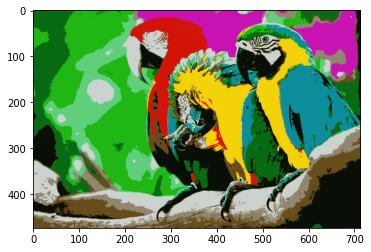

In [6]:
for n_cluster in range(1, 21):
    
    mean_image, median_image = kmeans_clustering(X, n_cluster)
    psnr_mean, psnr_median = psnr(image, mean_image), psnr(image, median_image)
    
    print(max(psnr_mean, psnr_median))
    
    pylab.imshow(mean_image)
    
    if (psnr_mean > 20 or psnr_median > 20):
        break

In [7]:
write_answer('submission_kmeans.txt', 11)

Это значение получается при использовании среднего значения цвета.